In [5]:
import numpy as np
#import pickle
import cv2
import os
import matplotlib.pyplot as plt
#from more_itertools import locate

# SK-Learn
from skimage.feature import hog
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#Import pictures
def load_images_from_folder(folder):
    images = []
    for expression in os.listdir(folder):
        path = folder + expression
        #print(path)
        for filename in os.listdir(path):
            #print(filename)
            img = cv2.imread(path + '/' +filename)

            if img is not None:
                images.append(img)
    return images

train_dir = 'Data/train/'
test_dir = 'Data/test/'


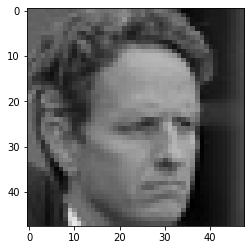

In [6]:
training = load_images_from_folder(train_dir)
testing = load_images_from_folder(test_dir)

#Display first image in training data
img = training[0]
imgplot = plt.imshow(img)
plt.show()

In [9]:
#Caculate HoG for every image in data

hog_features_training = np.asarray([hog(image_training, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2)) for image_training in training])
hog_features_test = np.asarray([hog(image_test, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2)) for image_test in testing])

#print shape
print(hog_features_training.shape)
print(hog_features_test.shape)

(28666, 900)
(7178, 900)


In [13]:
#Split up into training and test 
X_trn_hog = hog_features_training
Y_trn = imageLabels #TODO need to change this

X_test_hog = hog_features_test
Y_test = testImageLabels #TODO need to change this

## SVM Classifiers

In [14]:
#Linear SVM
# create SVM models
svm_hog = svm.SVC(kernel='linear', gamma='scale')

# train SVM models
svm_hog.fit(X_trn_hog, Y_trn)

# evaluate SVM models with the confusion matrix and with accuracy
hog_predictions = svm_hog.predict(X_test_hog)
print('HoG Accuracy: {}'.format(accuracy_score(Y_test, hog_predictions))) 
plt.subplot(111), plt.imshow(confusion_matrix(Y_test, hog_predictions)), plt.title('HoG Confusion Matrix')
plt.show()

NameError: name 'Y_trn' is not defined

In [ ]:
#Non-Linear SVMS - poly and rbf kernel

# create SVM models
svm_poly = svm.SVC(kernel='poly', gamma='scale')
svm_rbf = svm.SVC(kernel='rbf', gamma='scale')

# train SVM models
svm_poly.fit(X_trn_hog, Y_trn)
svm_rbf.fit(X_trn_hog, Y_trn)

# evaluate SVM models with the confusion matrix and with accuracy
poly_predictions = svm_poly.predict(X_test_hog)
rbf_predictions = svm_rbf.predict(X_test_hog)
print('Polynomial Accuracy: {}'.format(accuracy_score(Y_test, poly_predictions)))
print('Radial Basis Function Accuracy: {}'.format(accuracy_score(Y_test, rbf_predictions)))
plt.subplot(121), plt.imshow(confusion_matrix(Y_test, poly_predictions)), plt.title('Polynomial Confusion Matrix')
plt.subplot(122), plt.imshow(confusion_matrix(Y_test, hog_predictions)), plt.title('RBF Confusion Matrix')
plt.show()

## Random Forest Classifiers

In [ ]:
# create random forest classifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

# train classifier
rf.fit(X_trn_hog, Y_trn)

# evaluate classifier performance
rf_predictions = rf.predict(X_test_hog)
print('Random Forest Accuracy: {}'.format(accuracy_score(Y_test, rf_predictions)))
plt.imshow(confusion_matrix(Y_test, rf_predictions)), plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
def randomForest(nbr_estimators_list):
    for nbr_estimator in nbr_estimators_list:
        # create random forest classifier
        rf = RandomForestClassifier(n_estimators=nrb_estimator, criterion='entropy')

        # train classifier
        rf.fit(X_trn_hog, Y_trn)

        # evaluate classifier performance
        rf_predictions = rf.predict(X_test_hog)
        print('Random Forest Accuracy: {}'.format(accuracy_score(Y_test, rf_predictions)))
        plt.imshow(confusion_matrix(Y_test, rf_predictions)), plt.title('Random Forest Confusion Matrix')
        plt.show()

In [ ]:
nbr_estimators_list = [40, 100, 200, 250, 300, 350, 400, 450, 500, 1000, 5000]
randomForest(nbr_estimators_list)

## Comparison of Classifiers

In [ ]:
#Performance Analysis

# predictions on training set for both classifiers
svm_rbf_trn_predictions = svm_rbf.predict(X_trn_hog)
rf1000_trn_predictions = rf1000.predict(X_trn_hog)
print('SVM RBF Training Set Accuracy: {}'.format(accuracy_score(Y_trn, svm_rbf_trn_predictions)))
print('Random Forest 1000-tree Training Set Accuracy: {}'.format(accuracy_score(Y_trn, rf1000_trn_predictions)))
plt.subplot(121), plt.imshow(confusion_matrix(Y_trn, svm_rbf_trn_predictions)), plt.title('SVM RBF Training Set')
plt.subplot(122), plt.imshow(confusion_matrix(Y_trn, rf1000_trn_predictions)), plt.title('RF 1000-tree Training Set')
plt.show()

# compare confusion matrices
print(np.subtract(confusion_matrix(Y_trn, svm_rbf_trn_predictions), confusion_matrix(Y_trn, rf1000_trn_predictions)))

# re-print test set results for convenience
print('Radial Basis Function Accuracy: {}'.format(accuracy_score(Y_test, rbf_predictions)))
print('Random Forest 1000-tree Accuracy: {}'.format(accuracy_score(Y_test, rf1000_predictions)))
plt.subplot(121), plt.imshow(confusion_matrix(Y_test, hog_predictions)), plt.title('RBF Confusion Matrix')
plt.subplot(122), plt.imshow(confusion_matrix(Y_test, rf1000_predictions)), plt.title('RF 1000-tree')
plt.show()

# compare confusion matrices
print(np.subtract(confusion_matrix(Y_test, hog_predictions), confusion_matrix(Y_test, rf1000_predictions)))

In [ ]:
#TODO folded analysis